In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [355]:
df = pd.read_csv('Social_Network_Ads.csv')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [359]:
df = df.drop(columns=['User ID'])

In [361]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [363]:
(df['Gender']=='Male').sum()

196

In [365]:
(df['Purchased']==1).sum()

143

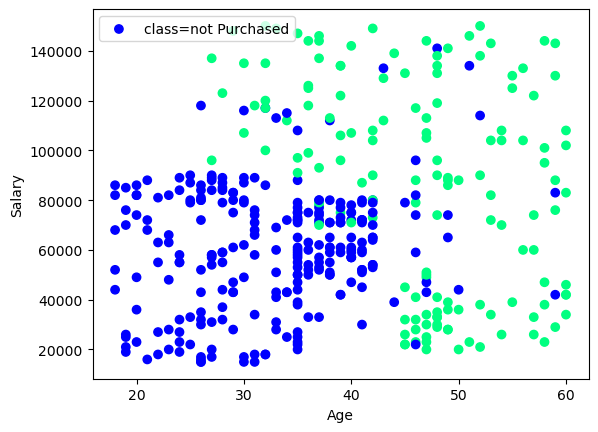

In [367]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='winter', label='class={}'.format('not Purchased'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [369]:
((df['Gender']=='Male') & (df['Purchased']==1)).sum() 

66

In [371]:
((df['Gender']=='Female') & (df['Purchased']==1)).sum() 

77

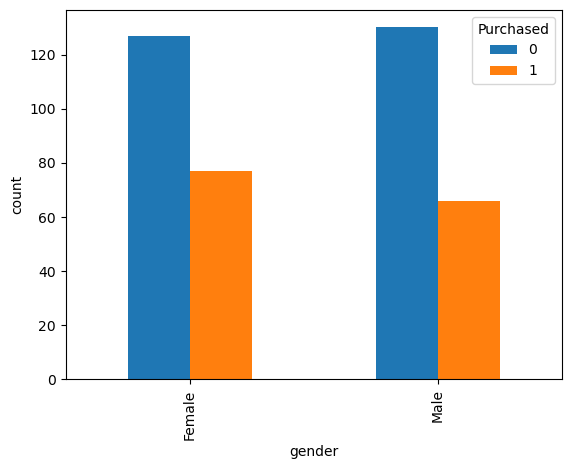

In [373]:
group = df.groupby(['Gender', 'Purchased']).size().unstack()

group.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('count')
plt.legend(title='Purchased')

<Axes: xlabel='Gender', ylabel='count'>

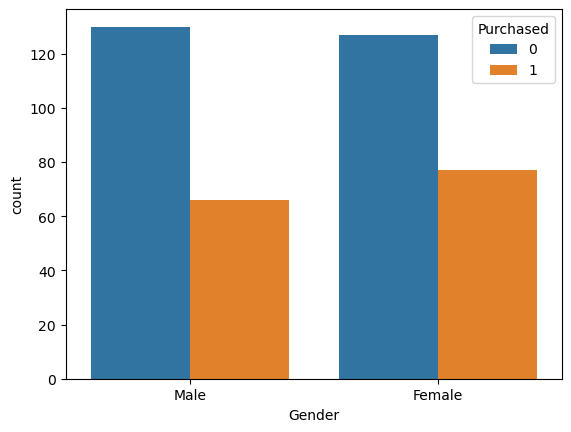

In [375]:
# same kaam using seaborn 
import seaborn as sns
sns.countplot(data=df, x='Gender', hue='Purchased')

In [377]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [379]:
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [381]:
Encoded_Gender = ohe.fit_transform(df[['Gender']])

In [383]:
df['Encoded_Gender'] = Encoded_Gender

In [385]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased,Encoded_Gender
327,Female,42,75000,0,0.0
102,Female,32,86000,0,0.0
130,Male,31,58000,0,1.0
241,Male,38,59000,0,1.0
346,Male,53,72000,1,1.0


In [387]:
df = df.drop(columns=['Gender'])

In [389]:
df.sample(5)

,Age,EstimatedSalary,Purchased,Encoded_Gender
196,30,79000,0,0.0
330,38,51000,0,1.0
2,26,43000,0,0.0
92,26,15000,0,1.0
396,51,23000,1,1.0


In [391]:
slc = StandardScaler()
EstimatedSalary = slc.fit_transform(df[['EstimatedSalary']])

In [393]:
df['EstimatedSalary'] = EstimatedSalary

In [395]:
df

,Age,EstimatedSalary,Purchased,Encoded_Gender
0,19,-1.490046,0,1.0
1,35,-1.460681,0,1.0
2,26,-0.785290,0,0.0
3,27,-0.374182,0,0.0
4,19,0.183751,0,1.0
...,...,...,...,...
395,46,-0.844019,1,0.0
396,51,-1.372587,1,1.0
397,50,-1.460681,1,0.0
398,36,-1.078938,0,1.0


In [397]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [399]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=10)

In [401]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [403]:
y_pred = lr.predict(x_test)

In [405]:
accuracy_score(y_test, y_pred)

0.9

In [407]:
from sklearn.model_selection import cross_val_score

In [409]:
cross_val_score(lr, x_train, y_train, cv=10)

array([0.84375, 0.75   , 0.84375, 0.84375, 0.875  , 0.875  , 0.84375,
       0.8125 , 0.8125 , 0.84375])

## Using the ColumnswTransformer

In [412]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

In [414]:
df = pd.read_csv('Social_Network_Ads.csv')

In [416]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [418]:
df = df.drop(columns=['User ID'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [420]:
trf1 = ColumnTransformer([
    ('Encoded_Gender', OneHotEncoder(drop='first', sparse_output=False), [0]),
    ('Scalled_EstimatedSalary', StandardScaler(), [2])
])

In [422]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [424]:
new_cols = trf1.fit_transform(x, y)

In [426]:
df[['Encoded_Gender','Scalled_EstimatedSalary']] = new_cols

In [428]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased,Encoded_Gender,Scalled_EstimatedSalary
14,Male,18,82000,0,1.0,0.359940
169,Female,29,47000,0,0.0,-0.667830
4,Male,19,76000,0,1.0,0.183751
226,Female,36,126000,1,0.0,1.651993
314,Female,39,79000,0,0.0,0.271845


In [430]:
df = df.drop(columns=['Gender', 'EstimatedSalary'])
df.sample(4)

,Age,Purchased,Encoded_Gender,Scalled_EstimatedSalary
356,54,1,1.0,0.007561
315,39,1,0.0,0.154386
38,26,0,0.0,0.066291
308,36,1,1.0,1.622629


In [432]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=10)

In [436]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [438]:
y_pred = lr.predict(x_test)

In [440]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [442]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x_train, y_train, cv=10)

array([0.84375, 0.75   , 0.84375, 0.84375, 0.875  , 0.875  , 0.84375,
       0.8125 , 0.8125 , 0.84375])